In [11]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [12]:
train = pd.read_csv("final_train.csv")

In [13]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [14]:
X = pd.get_dummies(X)

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## Check cross validation scores with different algorithms 

In [6]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
scores = cross_val_score(clf,X_scaled,y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

[0.83185841 0.76106195 0.78761062 0.84955752 0.83928571]
The accuracy of LogisticRegression is 81.39%


In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[0.81415929 0.74336283 0.78761062 0.85840708 0.8125    ]
The accuration of GaussianNB is 80.32%


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[0.72566372 0.69911504 0.77876106 0.77876106 0.73214286]
The accuration of DecisionTreeClassifier is 74.29%


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 75.71%


In [21]:
from sklearn.svm import SVC
clf = SVC()
scores = cross_val_score(clf,X_scaled, y,cv=5)
print('The accuration of SVC is %.2f%%' % (scores.mean()*100))
all_scores['SVC'] = scores.mean() * 100

The accuration of SVC is 81.21%


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of KNN is %.2f%%' % (scores.mean()*100))
all_scores['KNN'] = scores.mean() * 100

The accuration of KNN is 70.56%


In [23]:
all_scores

{'LogisticRegression': 81.38748419721871,
 'GaussianNB': 80.320796460177,
 'DecisionTreeClassifier': 74.28887484197219,
 'RandomForestClassifier': 75.7079646017699,
 'SVC': 81.21049304677624,
 'KNN': 70.56257901390646}

[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'KNN')]

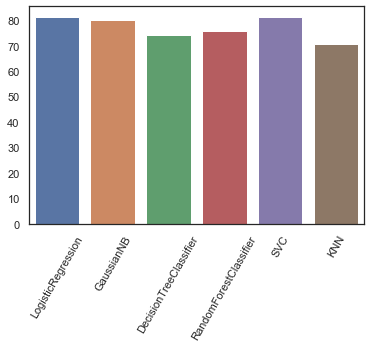

In [24]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logistic Regression with built-in Cross Validation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=500, random_state=0).fit(X_scaled, y)

In [27]:
score = clf.score(X_scaled,y)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8156028368794326
